In [ ]:
!pip install SimpleITK
import os
import pandas as pd
import glob
import nibabel as nib
import numpy as np
from glob import glob
from keras.utils import multi_gpu_model
from keras import optimizers
import matplotlib.pyplot as plt
import collections as clt

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats 
from __future__ import print_function
import numpy
import SimpleITK as sitk
import six


     |████████████████████████████████| 44.9MB 94kB/s 
     |████████████████████████████████| 163kB 8.1MB/s 
     |████████████████████████████████| 40kB 4.3MB/s 


In [ ]:
!cd

   

/bin/bash: cd/content/drive/MyDrive/Colab: No such file or directory


In [ ]:
!wget https://www.cbica.upenn.edu/sbia/Spyridon.Bakas/MICCAI_BraTS/2019/MICCAI_BraTS_2019_Data_Training.zip


--2020-11-22 17:13:04--  https://www.cbica.upenn.edu/sbia/Spyridon.Bakas/MICCAI_BraTS/2019/MICCAI_BraTS_2019_Data_Training.zip
Resolving www.cbica.upenn.edu (www.cbica.upenn.edu)... 165.123.244.124
Connecting to www.cbica.upenn.edu (www.cbica.upenn.edu)|165.123.244.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2759083974 (2.6G) [application/zip]
Saving to: ‘MICCAI_BraTS_2019_Data_Training.zip’

MICCAI_BraTS_2019_D 100%[===================>]   2.57G  46.4MB/s    in 63s     

2020-11-22 17:14:07 (41.9 MB/s) - ‘MICCAI_BraTS_2019_Data_Training.zip’ saved [2759083974/2759083974]

unzip:  cannot find or open /content/drive/MyDrive/Colab Notebooks/brats2019/MICCAI_BraTS_2019_Data_Training.zip, /content/drive/MyDrive/Colab Notebooks/brats2019/MICCAI_BraTS_2019_Data_Training.zip.zip or /content/drive/MyDrive/Colab Notebooks/brats2019/MICCAI_BraTS_2019_Data_Training.zip.ZIP.


In [ ]:
!unzip '/content/MICCAI_BraTS_2019_Data_Training.zip'


Archive:  /content/MICCAI_BraTS_2019_Data_Training.zip
   creating: MICCAI_BraTS_2019_Data_Training/
   creating: MICCAI_BraTS_2019_Data_Training/HGG/
   creating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/
  inflating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_11_1_seg.nii.gz  
  inflating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_11_1_t1ce.nii.gz  
  inflating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_11_1_t1.nii.gz  
  inflating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_11_1_t2.nii.gz  
  inflating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_11_1_flair.nii.gz  
   creating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_12_1/
  inflating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_12_1/BraTS19_2013_12_1_seg.nii.gz  
  inflating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_12_1/BraTS19_2013_12_1_t1ce.nii.gz  
  inflating: MICCAI_BraTS

In [ ]:

t1=sitk.ReadImage('/content/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_CBICA_AAP_1/BraTS19_CBICA_AAP_1_t1.nii.gz');
t2=sitk.ReadImage('/content/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_CBICA_AAP_1/BraTS19_CBICA_AAP_1_t2.nii.gz');
t1ce=sitk.ReadImage('/content/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_CBICA_AAP_1/BraTS19_CBICA_AAP_1_t1ce.nii.gz');
flair=sitk.ReadImage('/content/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_CBICA_AAP_1/BraTS19_CBICA_AAP_1_flair.nii.gz');
gt=sitk.ReadImage('/content/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_CBICA_AAP_1/BraTS19_CBICA_AAP_1_seg.nii.gz');
df=pd.read_csv('/content/MICCAI_BraTS_2019_Data_Training/survival_data.csv')

(155, 240, 240)


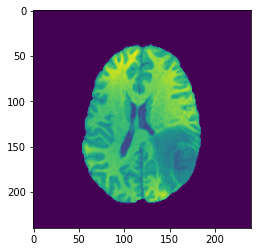

In [ ]:
t1_arr = sitk.GetArrayFromImage(t1)
print(t1_arr.shape)
plt.imshow(t1_arr[80,:,:])

(155, 240, 240)


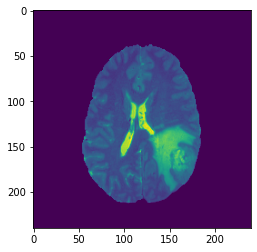

In [ ]:
t2_arr = sitk.GetArrayFromImage(t2)
print(t2_arr.shape)
plt.imshow(t2_arr[80,:,:])

(155, 240, 240)


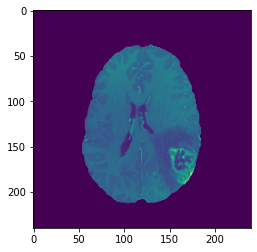

In [ ]:
t1ce_arr = sitk.GetArrayFromImage(t1ce)
print(t1ce_arr.shape)
plt.imshow(t1ce_arr[80,:,:])

(155, 240, 240)


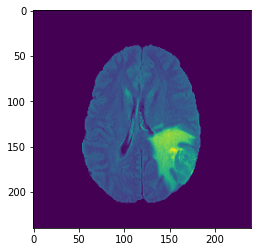

In [ ]:
flair_arr = sitk.GetArrayFromImage(flair)
print(flair_arr.shape)
plt.imshow(flair_arr[80,:,:])

(155, 240, 240)


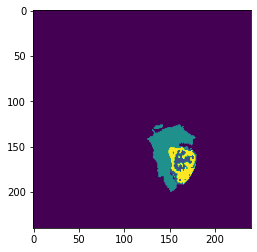

In [ ]:
gt_arr = sitk.GetArrayFromImage(gt)
print(gt_arr.shape)
plt.imshow(gt_arr[80,:,:])

In [ ]:
df.head()

,BraTS19ID,Age,Survival,ResectionStatus
0,BraTS19_CBICA_AAB_1,60.463014,289,GTR
1,BraTS19_CBICA_AAG_1,52.263014,616,GTR
2,BraTS19_CBICA_AAL_1,54.301370,464,GTR
3,BraTS19_CBICA_AAP_1,39.068493,788,GTR
4,BraTS19_CBICA_ABB_1,68.493151,465,GTR


In [ ]:

df['Survival'][3] # 3 for patient 'BraTS19_CBICA_AAP_1'

'788'